In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [5]:
# Load data
df = pd.read_csv('data/hr_data.csv')  # Adjust filename as needed

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset Info:
Shape: (14999, 10)
Columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [7]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.0

In [8]:
# Target distribution
print("\nTarget Variable Distribution:")
print(df['left'].value_counts())
print(f"Turnover Rate: {df['left'].mean():.2%}")


Target Variable Distribution:
left
0    11428
1     3571
Name: count, dtype: int64
Turnover Rate: 23.81%


In [9]:
# Data types
print("\nData Types:")
print(df.dtypes)


Data Types:
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


In [10]:
# Visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Employee Turnover Distribution')

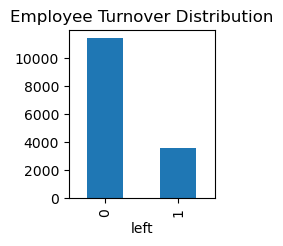

In [11]:
# 1. Target distribution
plt.subplot(2, 3, 1)
df['left'].value_counts().plot(kind='bar')
plt.title('Employee Turnover Distribution')

Text(0.5, 1.0, 'Satisfaction Level vs Turnover')

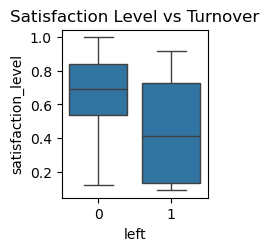

In [12]:
# 2. Satisfaction level by turnover
plt.subplot(2, 3, 2)
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level vs Turnover')

Text(0.5, 1.0, 'Average Monthly Hours vs Turnover')

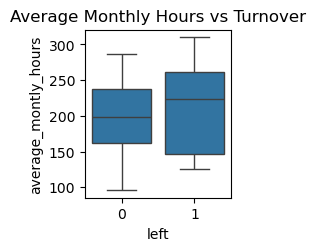

In [13]:
# 3. Average monthly hours by turnover
plt.subplot(2, 3, 3)
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title('Average Monthly Hours vs Turnover')

Text(0.5, 1.0, 'Number of Projects vs Turnover')

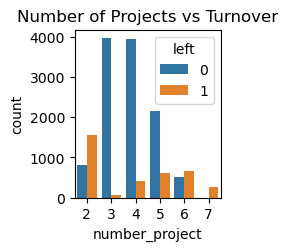

In [14]:
# 4. Number of projects by turnover
plt.subplot(2, 3, 4)
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Number of Projects vs Turnover')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'hr'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'technical'),
  Text(3, 0, 'support'),
  Text(4, 0, 'sales'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'RandD'),
  Text(9, 0, 'management')])

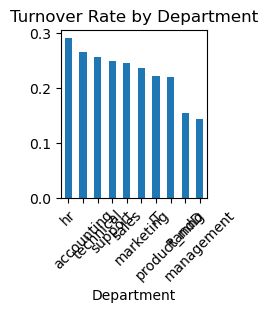

In [15]:
# 5. Department-wise turnover
plt.subplot(2, 3, 5)
dept_turnover = df.groupby('Department')['left'].mean().sort_values(ascending=False)
dept_turnover.plot(kind='bar')
plt.title('Turnover Rate by Department')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Turnover Rate by Salary Level')

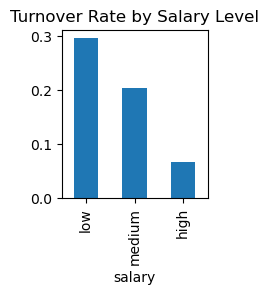

In [16]:
# 6. Salary-wise turnover
plt.subplot(2, 3, 6)
salary_turnover = df.groupby('salary')['left'].mean().sort_values(ascending=False)
salary_turnover.plot(kind='bar')
plt.title('Turnover Rate by Salary Level')

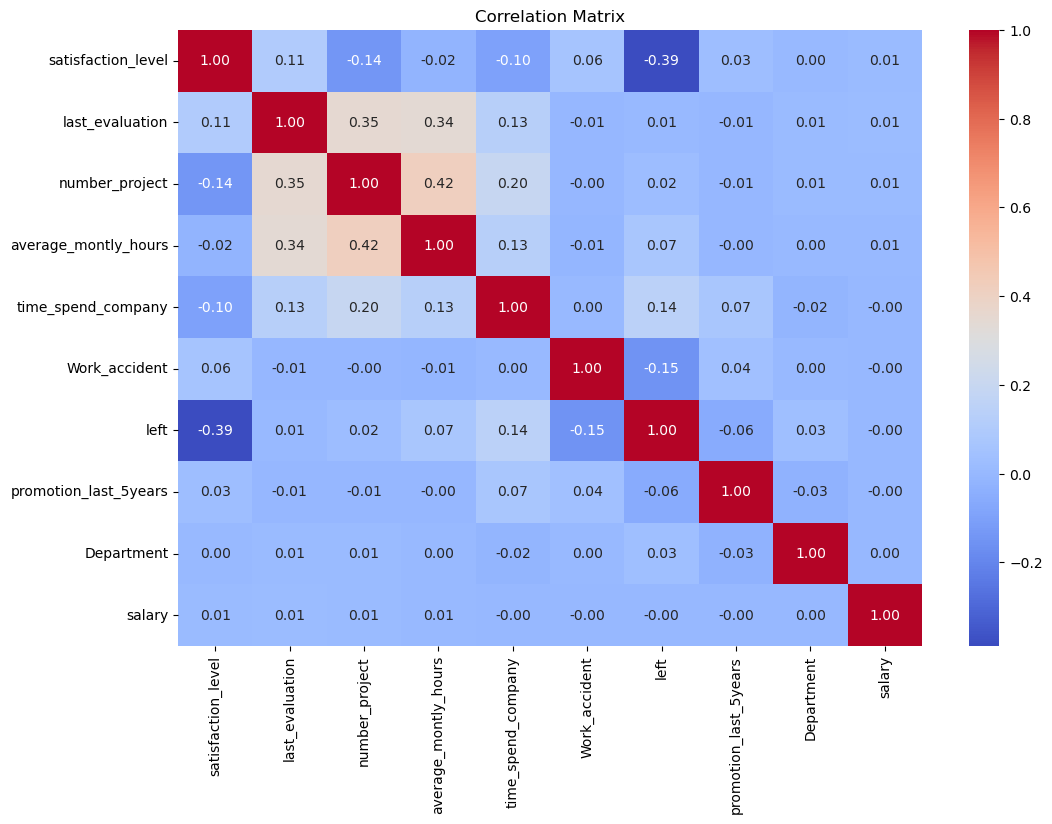

In [18]:
# Correlation matrix
plt.figure(figsize=(12, 8))
# Create encoded version for correlation
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['Department'] = le.fit_transform(df_encoded['Department'])
df_encoded['salary'] = le.fit_transform(df_encoded['salary'])

sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
